Mohammad Labib Husain 

2101989

C2 Ilmu Komputer


## Pra Proses

In [242]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA
import joblib
import pickle

In [243]:
#import dataset pmi
df_pmi = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSrlLc5t6Mg_Vo82OYmCG9_K8PyPDFMq0F5e4OosMscn9LQMYImSmotnOBRyAwR9ulCVjZfvUcpcOfk/pub?gid=1568258543&single=true&output=csv')

In [244]:
df_pmi
df_pmi.loc[df_pmi["tahun"]=='2015']

,prov,tahun,kategori_pmi


In [245]:
#import data set melek huruf
df_huruf = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS9JeOz7eR5l2krBLKQ_TY-4axSA3_wRIxOUU-oK9tDJuqaYnSO6uJe7ojaNCEJeIVz9LgbqP3_F8xP/pub?gid=1619148514&single=true&output=csv')

In [246]:
# ubah strip menjadi null dan ubah tipe data menjadi float
df_huruf.loc[(df_huruf.melek_huruf_diatas15=='-'), "melek_huruf_diatas15"] = np.nan
df_huruf['melek_huruf_diatas15'].unique()
df_huruf['melek_huruf_diatas15'] = df_huruf['melek_huruf_diatas15'].astype('float64')


In [247]:
#import data set proporsi hidup
df_proporsi = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR-lhbmDjxUORqLoCYtz-EGkqPa3FkWSg8ReGPLkzobiYCArBVp5nTXtilToXIniJmA5uA6aReUGazC/pub?gid=401395677&single=true&output=csv')

In [248]:
df_proporsi

,tahun,proporsi_hidup_dibawah_50_persen_median_pendapatan,prov
0,2021,9.98,ACEH
1,2021,5.87,SUMATERA UTARA
2,2021,2.47,SUMATERA BARAT
3,2021,2.52,RIAU
4,2021,5.91,JAMBI
...,...,...,...
135,2018,13.85,MALUKU
136,2018,7.65,MALUKU UTARA
137,2018,14.95,PAPUA BARAT
138,2018,18.83,PAPUA


In [249]:
#import data set kepadatan penduduk
df_kepadatan = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQZyiBy42K1M11sy0XJfwGkfg7_06hDQOwMKFh2zc-cGGPmmWrnL9BzSTFX8dTzwIAdQ-Ac-FB0ta5i/pub?gid=1839480989&single=true&output=csv')

In [250]:
# ubah strip menjadi null dan ubah tipe data menjadi float
df_kepadatan.loc[(df_kepadatan.kepadatan_penduduk=='-'), "kepadatan_penduduk"] = np.nan
df_kepadatan['kepadatan_penduduk'].unique()
df_kepadatan['kepadatan_penduduk'] = df_kepadatan['kepadatan_penduduk'].astype('float64')


In [251]:
#import data set persen asupan kalori
df_asupan = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR_FkK4cSUdljf_R0tAeyt_oV3hTk2leJE1qPSbTK9Cm-Ihdg3gF26oCcBu-Mp7MX3_HPgnvVzv4898/pub?gid=96123570&single=true&output=csv')
df_asupan

,tahun,persen_asupan_kalori_bawah_1400,prov
0,2019,9.61,ACEH
1,2019,6.06,SUMATERA UTARA
2,2019,7.19,SUMATERA BARAT
3,2019,10.20,RIAU
4,2019,9.80,JAMBI
...,...,...,...
170,2015,27.20,MALUKU
171,2015,32.59,MALUKU UTARA
172,2015,29.74,PAPUA BARAT
173,2015,27.91,PAPUA


In [252]:
#import data set persen ketidakcukupan pangan
df_pangan = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRZqb4pkOeKvl_V7Q9_mxs9SPrbKDNnhGv00FjLEE5pe_joB67ICYx1ZqT3pZU5l0KkYLm6lAZA4hE8/pub?gid=487317017&single=true&output=csv')
df_pangan

,tahun,pct_tdk_cukup_pangan,prov
0,2021,6.90,ACEH
1,2021,6.33,SUMATERA UTARA
2,2021,6.02,SUMATERA BARAT
3,2021,10.61,RIAU
4,2021,9.25,JAMBI
...,...,...,...
170,2017,26.57,MALUKU
171,2017,34.05,MALUKU UTARA
172,2017,27.22,PAPUA BARAT
173,2017,34.27,PAPUA


In [253]:
#gabung data pmi dan huruf
df_merge1 = pd.merge(df_pmi, df_huruf, how='outer')
df_merge1

,prov,tahun,kategori_pmi,melek_huruf_diatas15
0,ACEH,2022,TINGGI,98.25
1,SUMATERA UTARA,2022,TINGGI,99.11
2,SUMATERA BARAT,2022,TINGGI,99.29
3,RIAU,2022,TINGGI,99.18
4,JAMBI,2022,TINGGI,98.10
...,...,...,...,...
446,INDONESIA,2018,NaN,95.66
447,INDONESIA,2017,NaN,95.50
448,INDONESIA,2016,NaN,95.38
449,INDONESIA,2015,NaN,95.22


In [254]:
#gabung data sebelumnya dengan proporsi / menambahkan proporsi ke dalam dataset gabungan
df_merge2 = pd.merge(df_proporsi, df_merge1, how='outer')
df_merge2

,tahun,proporsi_hidup_dibawah_50_persen_median_pendapatan,prov,kategori_pmi,melek_huruf_diatas15
0,2021,9.98,ACEH,TINGGI,98.24
1,2021,5.87,SUMATERA UTARA,TINGGI,99.19
2,2021,2.47,SUMATERA BARAT,TINGGI,99.26
3,2021,2.52,RIAU,TINGGI,99.20
4,2021,5.91,JAMBI,TINGGI,98.08
...,...,...,...,...,...
446,2022,NaN,INDONESIA,NaN,96.35
447,2017,NaN,INDONESIA,NaN,95.50
448,2016,NaN,INDONESIA,NaN,95.38
449,2015,NaN,INDONESIA,NaN,95.22


In [255]:
#gabung data sebelumnya dengan kepadatan / menambahkan kepadatan ke dalam dataset gabungan
df_merge4 = pd.merge(df_kepadatan, df_merge2, how='outer')
df_merge4

,prov,tahun,kepadatan_penduduk,proporsi_hidup_dibawah_50_persen_median_pendapatan,kategori_pmi,melek_huruf_diatas15
0,ACEH,2021,92.0,9.98,TINGGI,98.24
1,SUMATERA UTARA,2021,205.0,5.87,TINGGI,99.19
2,SUMATERA BARAT,2021,133.0,2.47,TINGGI,99.26
3,RIAU,2021,75.0,2.52,TINGGI,99.20
4,JAMBI,2021,72.0,5.91,TINGGI,98.08
...,...,...,...,...,...,...
448,MALUKU UTARA,2011,NaN,NaN,SEDANG,NaN
449,PAPUA BARAT,2011,NaN,NaN,SANGAT RENDAH,NaN
450,PAPUA,2011,NaN,NaN,SANGAT RENDAH,NaN
451,INDONESIA,2022,NaN,NaN,NaN,96.35


In [256]:
#gabung data sebelumnya dengan asupan / menambahkan asupan ke dalam dataset gabungan
df_merge5 = pd.merge(df_asupan, df_merge4, how='outer')
df_merge5

,tahun,persen_asupan_kalori_bawah_1400,prov,kepadatan_penduduk,proporsi_hidup_dibawah_50_persen_median_pendapatan,kategori_pmi,melek_huruf_diatas15
0,2019,9.61,ACEH,93.0,10.17,TINGGI,98.21
1,2019,6.06,SUMATERA UTARA,200.0,7.13,TINGGI,99.15
2,2019,7.19,SUMATERA BARAT,130.0,3.26,TINGGI,99.17
3,2019,10.20,RIAU,80.0,3.63,TINGGI,99.21
4,2019,9.80,JAMBI,72.0,6.87,TINGGI,98.20
...,...,...,...,...,...,...,...
448,2011,NaN,MALUKU,NaN,NaN,SEDANG,NaN
449,2011,NaN,MALUKU UTARA,NaN,NaN,SEDANG,NaN
450,2011,NaN,PAPUA BARAT,NaN,NaN,SANGAT RENDAH,NaN
451,2011,NaN,PAPUA,NaN,NaN,SANGAT RENDAH,NaN


In [257]:
#gabung data sebelumnya dengan pangan / menambahkan pangan ke dalam dataset gabungan

df_gabungan = pd.merge(df_pangan, df_merge5, how='outer')
df_gabungan

,tahun,pct_tdk_cukup_pangan,prov,persen_asupan_kalori_bawah_1400,kepadatan_penduduk,proporsi_hidup_dibawah_50_persen_median_pendapatan,kategori_pmi,melek_huruf_diatas15
0,2021,6.90,ACEH,NaN,92.0,9.98,TINGGI,98.24
1,2021,6.33,SUMATERA UTARA,NaN,205.0,5.87,TINGGI,99.19
2,2021,6.02,SUMATERA BARAT,NaN,133.0,2.47,TINGGI,99.26
3,2021,10.61,RIAU,NaN,75.0,2.52,TINGGI,99.20
4,2021,9.25,JAMBI,NaN,72.0,5.91,TINGGI,98.08
...,...,...,...,...,...,...,...,...
448,2011,NaN,MALUKU,NaN,NaN,NaN,SEDANG,NaN
449,2011,NaN,MALUKU UTARA,NaN,NaN,NaN,SEDANG,NaN
450,2011,NaN,PAPUA BARAT,NaN,NaN,NaN,SANGAT RENDAH,NaN
451,2011,NaN,PAPUA,NaN,NaN,NaN,SANGAT RENDAH,NaN


In [258]:
#Menampilkan nilai yang Null
df_gabungan.isnull().sum()

tahun                                                   0
pct_tdk_cukup_pangan                                  278
prov                                                    0
persen_asupan_kalori_bawah_1400                       278
kepadatan_penduduk                                    175
proporsi_hidup_dibawah_50_persen_median_pendapatan    313
kategori_pmi                                           11
melek_huruf_diatas15                                  139
dtype: int64

In [259]:
df_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 452
Data columns (total 8 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   tahun                                               453 non-null    int64  
 1   pct_tdk_cukup_pangan                                175 non-null    float64
 2   prov                                                453 non-null    object 
 3   persen_asupan_kalori_bawah_1400                     175 non-null    float64
 4   kepadatan_penduduk                                  278 non-null    float64
 5   proporsi_hidup_dibawah_50_persen_median_pendapatan  140 non-null    float64
 6   kategori_pmi                                        442 non-null    object 
 7   melek_huruf_diatas15                                314 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 31.9+ KB


In [262]:
# ubah dataset provinsi menjadi kategori
df_gabungan['prov'].unique()
df_gabungan["prov"] = df_gabungan["prov"].astype("category")

In [263]:
df_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 452
Data columns (total 8 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   tahun                                               453 non-null    int64   
 1   pct_tdk_cukup_pangan                                175 non-null    float64 
 2   prov                                                453 non-null    category
 3   persen_asupan_kalori_bawah_1400                     175 non-null    float64 
 4   kepadatan_penduduk                                  278 non-null    float64 
 5   proporsi_hidup_dibawah_50_persen_median_pendapatan  140 non-null    float64 
 6   kategori_pmi                                        442 non-null    object  
 7   melek_huruf_diatas15                                314 non-null    float64 
dtypes: category(1), float64(5), int64(1), object(1)
memory usage: 30.1+ KB


In [264]:
#isi data null dari kategori pmi menjadi none
df_gabungan['kategori_pmi'].fillna('None', inplace = True)

In [265]:
df_gabungan['kategori_pmi'].unique()

array(['TINGGI', 'SEDANG', 'SANGAT TINGGI', 'None', 'SANGAT RENDAH'],
      dtype=object)

In [276]:
#ubah tipe data tahun menjadi kategori
df_gabungan['tahun'].unique()
df_gabungan["tahun"] = df_gabungan["tahun"].astype("category")

In [277]:
df_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 452
Data columns (total 8 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   tahun                                               453 non-null    category
 1   pct_tdk_cukup_pangan                                175 non-null    float64 
 2   prov                                                453 non-null    category
 3   persen_asupan_kalori_bawah_1400                     175 non-null    float64 
 4   kepadatan_penduduk                                  278 non-null    float64 
 5   proporsi_hidup_dibawah_50_persen_median_pendapatan  140 non-null    float64 
 6   kategori_pmi                                        453 non-null    object  
 7   melek_huruf_diatas15                                314 non-null    float64 
dtypes: category(2), float64(5), object(1)
memory usage: 27.6+ KB


## EDA

In [286]:
df_eda = df_gabungan.copy()

In [287]:
df_eda

,tahun,pct_tdk_cukup_pangan,prov,persen_asupan_kalori_bawah_1400,kepadatan_penduduk,proporsi_hidup_dibawah_50_persen_median_pendapatan,kategori_pmi,melek_huruf_diatas15
0,2021,6.90,ACEH,NaN,92.0,9.98,TINGGI,98.24
1,2021,6.33,SUMATERA UTARA,NaN,205.0,5.87,TINGGI,99.19
2,2021,6.02,SUMATERA BARAT,NaN,133.0,2.47,TINGGI,99.26
3,2021,10.61,RIAU,NaN,75.0,2.52,TINGGI,99.20
4,2021,9.25,JAMBI,NaN,72.0,5.91,TINGGI,98.08
...,...,...,...,...,...,...,...,...
448,2011,NaN,MALUKU,NaN,NaN,NaN,SEDANG,NaN
449,2011,NaN,MALUKU UTARA,NaN,NaN,NaN,SEDANG,NaN
450,2011,NaN,PAPUA BARAT,NaN,NaN,NaN,SANGAT RENDAH,NaN
451,2011,NaN,PAPUA,NaN,NaN,NaN,SANGAT RENDAH,NaN


In [296]:
# # Mencari kota dengan transaksi barang dengan harga yang mahal dan murah
# df_tampung = df_eda.groupby(["prov"])["kepadatan_penduduk"].reset_index()
# fig, ax = plt.subplots(figsize=(20, 8)) #atur ukuran chart
# sns.barplot(ax=ax, x="prov", y="kepadatan_penduduk", data=df_tampung)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.show()


<AxesSubplot:xlabel='pct_tdk_cukup_pangan'>

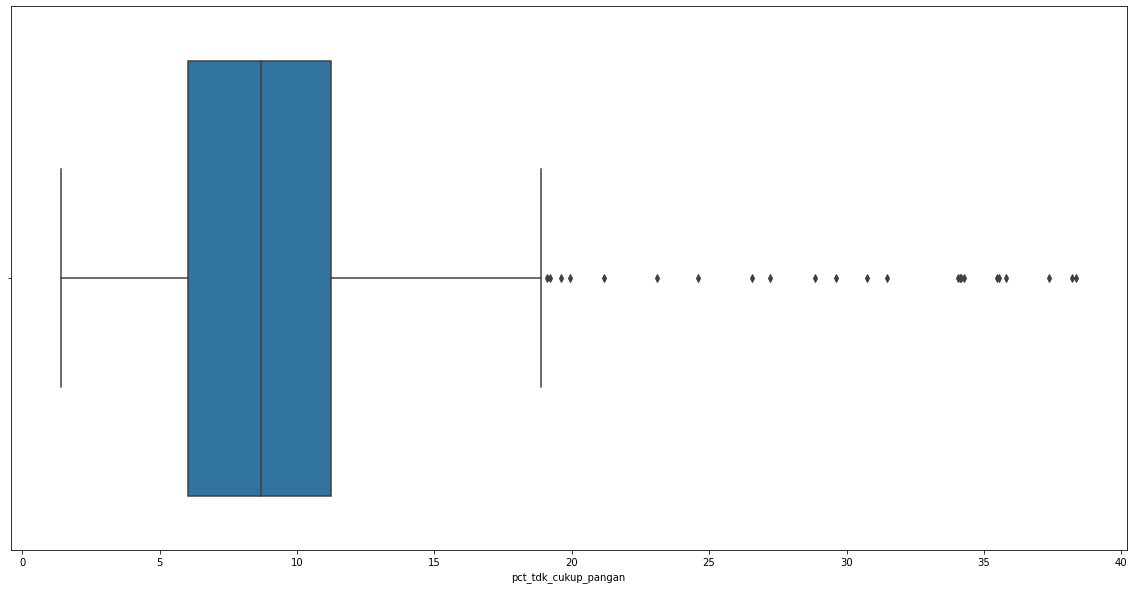

In [295]:

fig, ax = plt.subplots(figsize = (20,10))
sns.boxplot(ax=ax, x="pct_tdk_cukup_pangan", data=df_eda)


Menunjukkan bahwa banyak yang keluar dari line

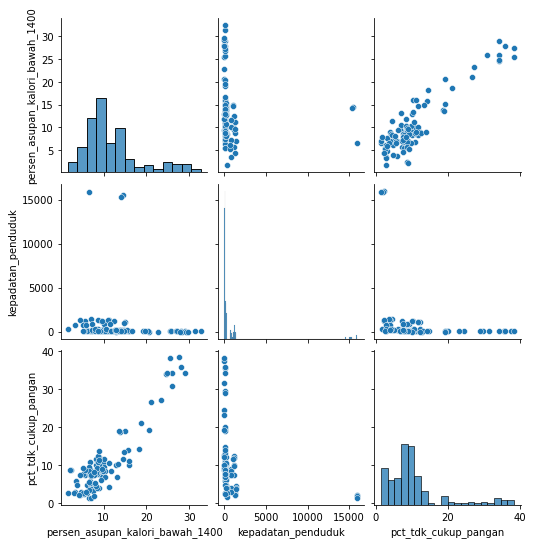

In [292]:
sns.pairplot(data=df_eda[['persen_asupan_kalori_bawah_1400','kepadatan_penduduk','pct_tdk_cukup_pangan']])


In [268]:
df


,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment,Tahun,Bulan
0,1,2012-04-01,4/3/2012,186,m,denim,25,69.90,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,0,2012,4
1,2,2012-04-01,4/3/2012,71,9+,ocher,21,69.95,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,1,2012,4
2,3,2012-04-01,4/3/2012,71,9+,curry,21,69.95,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,1,2012,4
3,4,2012-04-02,?,22,m,green,14,39.90,808,Mrs,11/9/1959,Saxony,1/4/2012,0,2012,4
4,5,2012-04-02,12/31/1990,151,39,black,53,29.90,825,Mrs,7/11/1964,Rhineland-Palatinate,2/16/2011,0,2012,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481087,481088,2013-03-31,4/9/2013,2561,39+,blue,1,139.90,7032,Mr,12/17/1962,Lower Saxony,3/12/2011,1,2013,3
481088,481089,2013-03-31,4/2/2013,2669,39,grey,18,130.00,86610,Mrs,?,Berlin,3/24/2012,0,2013,3
481089,481090,2013-03-31,12/31/1990,2458,XXL,black,5,99.90,86611,Mr,5/16/1973,Berlin,3/31/2013,0,2013,3
481090,481091,2013-03-31,12/31/1990,2659,XXL,black,49,99.90,86611,Mr,5/16/1973,Berlin,3/31/2013,0,2013,3


## Klasifikasi

In [279]:
df_temp = df_gabungan.copy()
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 452
Data columns (total 8 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   tahun                                               453 non-null    category
 1   pct_tdk_cukup_pangan                                175 non-null    float64 
 2   prov                                                453 non-null    category
 3   persen_asupan_kalori_bawah_1400                     175 non-null    float64 
 4   kepadatan_penduduk                                  278 non-null    float64 
 5   proporsi_hidup_dibawah_50_persen_median_pendapatan  140 non-null    float64 
 6   kategori_pmi                                        453 non-null    object  
 7   melek_huruf_diatas15                                314 non-null    float64 
dtypes: category(2), float64(5), object(1)
memory usage: 27.6+ KB


In [275]:
# df_temp = df_temp.drop(['orderItemID','orderDate', 'deliveryDate', 'dateOfBirth','creationDate'],axis=1)

In [280]:
df_temp = pd.get_dummies(data=df_temp, columns=['prov','tahun'])

In [282]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_temp.kategori_pmi)
Y = le.transform(df_temp.kategori_pmi)

In [283]:
X = df_temp.drop("kategori_pmi",axis=1)

In [284]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

with open("C:\\Users\\labib\\OneDrive\\Documents\\semester3\\Data Mining\\orders_class.pickle", 'wb') as fp:
 pickle.dump(X_train.columns, fp)


In [285]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric =
"mlogloss", max_depth = 10, gamma=0.1, subsample = 0.8, learning_rate=0.1,
n_estimators = 140, nthread=4)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.8901098901098901
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.91      0.94      0.92        52
           4       0.86      0.94      0.90        32

    accuracy                           0.89        91
   macro avg       0.55      0.58      0.56        91
weighted avg       0.84      0.89      0.87        91



C:\Users\labib\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\labib\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\labib\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [294]:
# clf1 = GaussianNB()
# clf1.fit(X_train, Y_train)
# Y_pred = clf1.predict(X_test)
# acc = accuracy_score(Y_test, Y_pred)
# print("Akurasi {}".format(acc))
# print(classification_report(Y_test, Y_pred))